In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output

#import SchemDraw as schem
#import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font) 

In [2]:
class Mean(object):
    def __init__(self):
        self.Re = 5185.897
        
    def get_data(self):
        filename = 'Channel-data/Re5200/LM_Channel_5200_mean_prof.dat'
        data_matrix = np.genfromtxt(filename, skip_header = 73, delimiter='', unpack=True, dtype=float)
        self.N = len(data_matrix[0,:])
        self.Re = 5185.897
        self.yoverh = data_matrix[0,:]
        self.yplus = data_matrix[1,:]
        self.u = data_matrix[2,:]
        self.dudy = data_matrix[3,:]
        
class Variance(object):
    def __init__(self):
        self.Re = 5185.897
        
    def get_data(self):
        filename = 'Channel-data/Re5200/LM_Channel_5200_vel_fluc_prof.dat'
        data_matrix = np.genfromtxt(filename, skip_header = 76, delimiter='', unpack=True, dtype=float)
        self.N = len(data_matrix[0,:])
        self.Re = 5185.897
        self.yoverh = data_matrix[0,:]
        self.yplus = data_matrix[1,:]
        self.uu = data_matrix[2,:]
        self.vv = data_matrix[3,:]
        self.ww = data_matrix[4,:]
        self.uv = data_matrix[5,:]
        self.k = data_matrix[8,:]
        
class Budgetk(object):
    def __init__(self):
        self.Re = 5185.897
        
    def get_data(self):
        filename = 'Channel-data/Re5200/LM_Channel_5200_RSTE_k_prof.dat'
        data_matrix = np.genfromtxt(filename, skip_header = 75, delimiter='', unpack=True, dtype=float)
        self.N = len(data_matrix[0,:])
        self.Re = 5185.897
        self.yoverh = data_matrix[0,:]
        self.yplus = data_matrix[1,:]
        self.production = data_matrix[2,:]
        self.tdiff = data_matrix[3,:]
        self.vdiff = data_matrix[4,:]
        self.pstrain = data_matrix[5,:]
        self.pdiff = data_matrix[6,:]
        self.dissipation = data_matrix[7,:]
        

<h1>Turbulent Mean Velocity Profile in a Channel Flow</h1>

The following data is extracted from the largest Reynolds number simulation available. The Reynolds number is based on the half-height of the channel $h$, the skin-friction velocity $u_\tau$ and the fluid kinematic viscosity $\nu$:

$$
h^+=Re_\tau=\frac{u_\tau h}{\nu}=5,200
$$

This is a very high Reynolds number, especially for a direct numerical simulation (DNS - no model used to solve the full Navier-Stokes equation). 



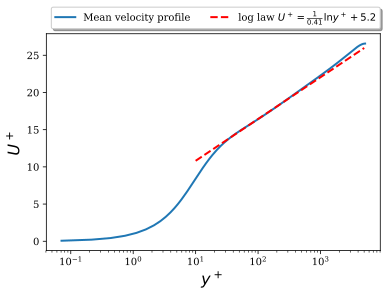

In [3]:
""" This cell reads the statistics """
mean = Mean()
#filename = "./Channel-data/Re5200/mean.dat"
#data_matrix = np.genfromtxt(filename, skip_header = 73, delimiter='', unpack=True, dtype=float)
mean.get_data()

plt.semilogx(mean.yplus,mean.u, lw = 2, label = r"Mean velocity profile")
y_log_law = np.logspace(1,3.7,100)
u_log_law = 1/(0.41) * np.log(y_log_law) + 5.2
plt.semilogx(y_log_law,u_log_law, 'r--', lw = 2, label = r"log law $U^+=\frac{1}{0.41}\ln y^++5.2$")
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=2, shadow=True, fancybox=True)
plt.xlabel("$y^+$", fontdict = fontlabel)
plt.ylabel("$U^+$", fontdict = fontlabel)
plt.show()

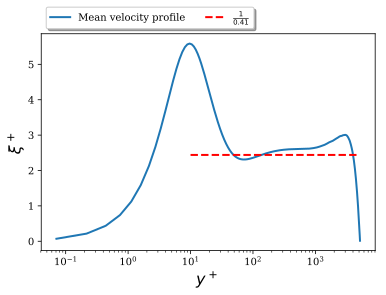

In [4]:
""" This cell reads the statistics """
mean = Mean()
#filename = "./Channel-data/Re5200/mean.dat"
#data_matrix = np.genfromtxt(filename, skip_header = 73, delimiter='', unpack=True, dtype=float)
mean.get_data()

plt.semilogx(mean.yplus,mean.yplus*mean.dudy, lw = 2, label = r"Mean velocity profile")
y_log_law = np.logspace(1,3.7,100)
u_log_law = 1/(0.41)*np.ones(100)
plt.semilogx(y_log_law,u_log_law, 'r--', lw = 2, label = r"$\frac{1}{0.41}$")
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=2, shadow=True, fancybox=True)
plt.xlabel("$y^+$", fontdict = fontlabel)
plt.ylabel(r"$\xi^+$", fontdict = fontlabel)
plt.show()

Indicator function
$$
\xi^+=y^+\frac{dU^+}{dy^+}
$$

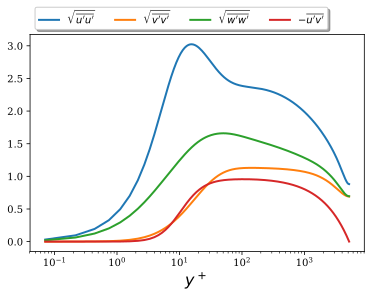

In [5]:
""" This cell reads the statistics """
variance = Variance()
#filename = "./Channel-data/Re5200/mean.dat"
#data_matrix = np.genfromtxt(filename, skip_header = 73, delimiter='', unpack=True, dtype=float)
variance.get_data()

plt.semilogx(mean.yplus,np.sqrt(variance.uu), lw = 2, label = r"$\sqrt{\overline{u'u'}}$")
plt.semilogx(mean.yplus,np.sqrt(variance.vv), lw = 2, label = r"$\sqrt{\overline{v'v'}}$")
plt.semilogx(mean.yplus,np.sqrt(variance.ww), lw = 2, label = r"$\sqrt{\overline{w'w'}}$")
plt.semilogx(mean.yplus,-variance.uv, lw = 2, label =r"$-\overline{u'v'}$")
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=4, shadow=True, fancybox=True)
plt.xlabel("$y^+$", fontdict = fontlabel)
# plt.ylabel("$\overline{u'_i^+$", fontdict = fontlabel)
plt.show()

<h1>Reynolds Average Navier-Stokes (RANS) Simulation</h1>

RANS simulation is derived from the Reynolds decomposition and averaging the Navier-Stokes equations:

The Reynolds decomposition splits any flow variable into its mean and its fluctuations:
<p class = "alert alert-danger">
$$
u(x,y,z,t)=\bar{u}(x,y,z)+u'(x,y,z,t)
$$
</p>
Fluctuations have the following properties:
<p class = "alert alert-danger">
$$
\overline{u'}=0
$$

$$
\overline{u'\bar{w}}=\overline{u'}\overline{\bar{w}}=\overline{u'}\bar{w}=0\text{ because }\overline{u'}=0
$$
</p>

Now replacing $u_i$ by $\bar{u}_i+u'_i$ and taking the average of the entire NSE and continuity equation, yield the following.

<h2> Mean Momentum Transport Equation</h2>

The RANS equation is defined as
<p class = "alert alert-danger">
$$
\frac{\partial \overline{u}_i}{\partial t}+\frac{\partial \overline{u}_i\overline{u}_j}{\partial x_j}=-\frac{1}{\rho}\frac{\partial \overline{p}}{\partial x_i}+\frac{\partial}{\partial x_j}\left[\nu\left(\frac{\partial \overline{u}_i}{\partial x_j}+\frac{\partial \overline{u}_j}{\partial x_i}\right)-\overline{u'_iu'_j}\right]
$$
</p>
which is complemented by the continuity equation:
<p class = "alert alert-danger">
$$
\frac{\partial \overline{u}_i}{\partial x_i}=0
$$
</p>
This equation could be solved providing that one knows how to calculate/model $\overline{u'_iu'_j}$. 

But how do we obtain $\overline{u'_iu'_j}$? The equation above describe a system of 4 equations for 13 variables: the mean velocity components (3), the pressure (1) and the Reynolds stress tensor $\overline{u'_iu'_j}$ (9). We therefore need 9 more equations (technically only 6 due to symmetries).

<h2>Budget equations for the Reynolds stress tensor $\overline{u'_iu'_j}$</h2>

After a little bit of algebra, transport equations for each individual components of the Reynolds tensor $\overline{u'_iu'_j}$ can be derived as:
<p class = "alert alert-danger">
$$
\frac{D\overline{u'_iu'_j}}{Dt} = P_{ij}+\varepsilon_{ij}+T_{ij}+\Pi_{ij}^s+\Pi_{ij}^d+V_{ij}
$$
</p>
Here 
$$
\frac{Da}{Dt}=\frac{\partial a}{\partial t}+\bar{u}_k\frac{\partial a}{\partial x_k}
$$
On the RHS, the following terms are referred to as production, dissipation, turbulent diffusion, pressure strain, pressure diffusion and viscous diffusion:
<p class = "alert alert-danger">
\begin{eqnarray}
P_{ij}&=&-\overline{u'_iu'_k}\frac{\partial\overline{u}_j}{\partial x_k}-\overline{u'_ju'_k}\frac{\partial\overline{u}_i}{\partial x_k}\\
\varepsilon_{ij}&=& -2\nu\overline{\frac{\partial u'_i}{\partial x_k}\frac{\partial u'_j}{\partial x_k}}\\
T_{ij} &=& \frac{\partial}{\partial x_k}\overline{u'_iu'_ju'_k}\\
\Pi^s_{ij}&=& \overline{p'\left(\frac{\partial u'_i}{\partial x_j}+\frac{\partial u'_j}{\partial x_i}\right)}\\
\Pi^d_{ij}&=& -\frac{\partial}{\partial x_k}\left(\overline{p'u'_i}\delta_{jk}+\overline{p'u'_j}\delta_{ik}\right)\\
V_{ij}&=& \nu\frac{\partial \overline{u'_iu'_j}}{\partial x_k}\\
\end{eqnarray}
</p>

This equation creates new terms, such as $\overline{u'_iu'_ju'_k}$, which would need an additional 27 equations!

<h2>Boussinesq closure model</h2>
A way around this nightmare is to close the mean transport equation with a model of the Reynolds shear stress tensor that is a function of the mean velocity only.

A popular closure model is 
<p class = "alert alert-danger">
$$
-\overline{u'_iu'_j} = \nu_t\left(\frac{\partial \overline{u}_i}{\partial x_j}+\frac{\partial \overline{u}_j}{\partial x_i}\right)-\frac{\delta_{ij}}{3}\overline{u'_iu'_i}
$$
</p>
The Boussinesq approximation is built on the assumption that the turbulent contribution to the mean momentum equation is of dissipative nature and therefore could be boiled down to a turbulent viscosity.

<h2>Mixing Length Model</h2>
The mixing length model is the simplest turbulence model, derived from the assumption that a log-law does exist. This assumption is not likely to be valid in complex flows.

<p class='alert alert-danger'>
$$
\nu_t = L_m^2\left\vert\frac{dU}{dy}\right\vert
$$
with
$$
L_m = \kappa y\left(1-e^{-y^+/A^+}\right)
$$
where $y$ is the distance from the wall, $y^+=yu_\tau/\nu$, $\kappa=0.41$ and $A^+=26$.
</p>

<h2>$k-\varepsilon$ Model</h2>

The most common turbulence model used in computational fluid dynamics assumes that the Reynolds stress tensor can be predicted using a gradient diffusion approach with an eddy viscosity model derived from the turbulent kinetic energy (TKE)
$$
k = \frac{\overline{u'_iu'_i}}{2}
$$,
the production of TKE:
$$
P=-\overline{u'_iu'_j}\frac{\partial \overline{u}_i}{\partial x_j}
$$
and the dissipation rate of TKE:
$$
\varepsilon= -\nu\overline{\frac{\partial u'_i}{\partial x_k}\frac{\partial u'_i}{\partial x_k}}
$$
such that
<p class='alert alert-danger'>
\begin{equation}
\nu_T=C_\mu\frac{k^2}{\varepsilon},\;\;\;\;\;\text{Eq. (1)}
\end{equation}
</p>
yielding
<p class='alert alert-danger'>
$$
\frac{\partial \overline{u}_i}{\partial t}+\frac{\partial \overline{u}_i\overline{u}_j}{\partial x_j}=-\frac{1}{\rho}\frac{\partial \overline{p}}{\partial x_i}+\frac{\partial}{\partial x_j}\left[(\nu+\nu_T)\left(\frac{\partial \overline{u}_i}{\partial x_j}+\frac{\partial \overline{u}_j}{\partial x_i}\right)\right]
$$
</p>
TKE is derived from the transport equation for the Reynolds stress tensor (see above):
<p class='alert alert-danger'>
$$
\frac{\partial k}{\partial t}+\overline{u}_j\frac{\partial k}{\partial x_j}=\frac{\partial}{\partial x_j}\left(\frac{\nu_t}{\sigma_k}\frac{\partial k}{\partial x_j}\right)+P-\varepsilon
$$
</p>
The transport equation for the dissipation rate of TKE is entirely empirical and writes:
<p class='alert alert-danger'>
$$
\frac{\partial \varepsilon}{\partial t}+\overline{u_j}\frac{\partial \varepsilon}{\partial x_j}=\frac{\partial}{\partial x_j}\left(\frac{\nu_t}{\sigma_\varepsilon}\frac{\partial \varepsilon}{\partial x_j}\right)+C_{\varepsilon1}\frac{P\varepsilon}{k}-C_{\varepsilon2}\frac{\varepsilon^2}{k}
$$
</p>
The standard model constants are:
<p class='alert alert-danger'>
$$
C_\nu=0.09,\;C_{\varepsilon1}=1.44,\;C_{\varepsilon2}=1.92,\;\sigma_k=1.0,\;\sigma_\varepsilon=1.3
$$
</p>

In this form, the $k-\varepsilon$ model is too dissipative close to the wall and only works if the first computational node off the wall is at a distance $y^+\gtrsim 30$, with the appropriate boundary condition.

<h2>$k-\omega-SST$ model</h2>
This model is a variation of the $k-\varepsilon$ model where $\omega=\varepsilon/k$ is the specific dissipation. The model is designed for grids that are well resolved $y^+<5$ and coarse $y^+>30$. The $k$ equation becomes:
<p class='alert alert-danger'>
$$
\frac{\partial k}{\partial t}+\overline{u}_j\frac{\partial k}{\partial x_j}=\frac{\partial}{\partial x_j}\left(\frac{\nu_t}{\sigma_k}\frac{\partial k}{\partial x_j}\right)+P_k-\beta^*k\omega
$$
</p>

The transport equation for the specific dissipation writes:
<p class='alert alert-danger'>
$$
\frac{\partial \omega}{\partial t}+\overline{u}_j\frac{\partial \omega}{\partial x_j}=\frac{\partial}{\partial x_j}\left[\left(\nu+\sigma_\omega\nu_t\right)\frac{\partial \omega}{\partial x_j}\right]+ 2(1-f_1)\sigma_{\omega_2}\frac{1}{\omega}\frac{\partial k}{\partial x_i}\frac{\partial\omega}{\partial x_i}
$$
</p>
where
<p class='alert alert-danger'>
$$
\nu_t = \frac{a_1k}{\max(a_1\omega,SF_2)}
$$
$$
S=\left\Vert\frac{1}{2}\left(\frac{\partial \bar{u}_i}{\partial x_j}+\frac{\partial \bar{u}_j}{\partial x_i}\right)\right\Vert
$$
$$
F_1=\tanh\left[
\left[
\min\left(\max
\left(\frac{\sqrt{k}}{\beta^*\omega y},\frac{500\nu}{y^2\omega}\right),\frac{4\sigma_{\omega_2}k}{CD_{k\omega}y^2}\right)
\right]^4
\right]
$$
$$
F_2=\tanh\left[\left[\max\left(\frac{\sqrt{k}}{\beta^*\omega y},\frac{500\nu}{y^2\omega}\right)\right]^2\right]
$$
</p>


<h2>Inlet Conditions</h2>

Internal flows are defined as cylindrical pipes, ducts and annulus. The flow is characterized by:
<ol>
<li> Velocity scale $U_b$, typically the bulk or average velocity (m/s).</li>
<li> The hydraulic diameter $D$ (m).</li>
<li> The fluid kinematic viscosity $\nu$ (m^2/s), or kinematic viscosity $\mu$ (kg/(m.s) and density $\rho$ (kg/m^3).</li>
</ol>
These parameters are used in the Reynolds number:
$$
Re=\frac{\rho U_bD}{\mu}=\frac{U_bD}{\nu}
$$



The following calculator provides estimates of the turbulent kinetic energy $k$ and $\omega$ based on the parameters above and the turbulent intensity
$$
I = \frac{u'}{U_b},
$$
where $u'$ is the typical standard deviation of the velocity fluctuations experienced by the flow. For ducts, the following correlation may be used:
$$
I=0.16Re^{-1/8}
$$
but you may use a larger value if your inlet is located immediately downstream of geometry creating intense turbulence. From the knowledge of $I$, $k$ and $\omega$ can be computed as:
$$
k=\frac{3}{2}(IU_b)^2
$$
$$
\omega = 0.09\frac{k}{\beta\nu}
$$
where $\beta$ is the ratio of turbulent viscosity to viscosity.




<h2>Assignment</h2>



<p class = 'alert alert-info'>
Using Buckingham-$\Pi$ theorem, rederive the turbulent viscosity for the $k-\varepsilon$ model

Explore the validity of the turbulent viscosity for both $k-\varepsilon$ and the mixing length model based on the DNS data. 
</p>

$$
\nu_t=f(k,\varepsilon)
$$

Plot $nu_t=C_\nu k^2/\varepsilon$ from the DNS and compare to the exact definition of $\nu_t$


<p class = 'alert alert-info'>
Simplify the $k-\varepsilon$ equations for a channel flow
</p>

FUlly developed channel flow: $\partial/\partial t=\partial/\partial x_1=0$

<p class = 'alert alert-info'>
Run and validate two RANS simulation using $k-\omega-SST$ model one with velocity inlet boundary condition and one with custom inlet boundary conditions where you use the following calculator to compute $k$ and$\omega$ at the inlet.
</p>
Use this website to set up your simulation:
https://turbmodels.larc.nasa.gov/backstep_val.html


In [6]:
geo = input('Boundary layer (b), channel (c), pipe (p), duct (d), or annulus (a)?')
if geo == 'b':
    D = float(input('boundary layer thickness (m):'))
elif geo == 'c':
    D = float(input('Channel height (m):'))
elif geo == 'p':
    D = float(input('Diameter (m):'))
elif geo == 'd':
    a = float(input('first dimension (m):'))
    b = float(input('second dimension (m):'))
    D = 4.*a*b/(2.*(a+b))
elif geo == 'a':
    Di = float(input('Inner diameter (m):'))
    Do = float(input('Outer diameter (m):'))
    D = Do - Di
else:
    print('your geometry is unknown')
u_cal = input('for velocity scale: mass flow (m) or bulk velocity (u)?')
if u_cal == 'u':
    U_b = float(input('Velocity scale (m/s):'))
elif u_cal == 'm':
    m = float(input('mass flow rate (kg/s):'))
    rho = float(input('fluid density (kg/m^3):'))
    if geo == 'p':
        area = np.pi*(D**2)/4.
    elif geo == 'd':
        area = a*b
    elif geo == 'a':
        area = np.pi/4.*(Do**2-Di**2)
    U_b = m/(rho*area)
    print('bulk velocity: %10.3e m/s' %U_b)
nu = float(input('Kinematic viscosity (m^2/s):'))
Re = U_b*D/nu
print("Reynolds number: %10.3e" %Re)
I_rec = 0.16*Re**(-1./8.)
print("Recommended turbulent intensity for pipe/duct: %10.3e" %I_rec)
I = float(input('Turbulent intensity:'))
if 'geo' == 'b': # only for k-e
    l = 0.04 * D
else:
    l = 0.07 * D
TKE = 3./2.*(I*U_b)**2
print("TKE = %10.3e m^2/s^2" %TKE)
omega = 0.09*TKE/50/nu
Re_b = np.array([3000., 5000., 10000., 15000., 20000., 100000])
b = np.array([11.6, 16.5, 26.7, 34.0, 50.1, 100.])
from scipy import interpolate
if Re < 100000.:
    f = interpolate.interp1d(Re_b,b)
    beta = f(Re)
else:
    beta = 100.
omega = 0.09*TKE/beta/nu
print("beta = %3.2f" %beta)
print("omega = %10.3e 1/s" %omega)
    

Boundary layer (b), channel (c), pipe (p), duct (d), or annulus (a)?b
boundary layer thickness (m):0.1
for velocity scale: mass flow (m) or bulk velocity (u)?u
Velocity scale (m/s):10
Kinematic viscosity (m^2/s):1e-6
Reynolds number:  1.000e+06
Recommended turbulent intensity for pipe/duct:  2.845e-02
Turbulent intensity:0.1
TKE =  1.500e+00 m^2/s^2
beta = 100.00
omega =  1.350e+03 1/s


In [7]:
filename = 'Data/cf.exp.bottomwall.dat'
data = np.genfromtxt(filename,delimiter='',skip_header=3)
x_benchmark = data[:,0]
Cf_benchmark = data[:,1]

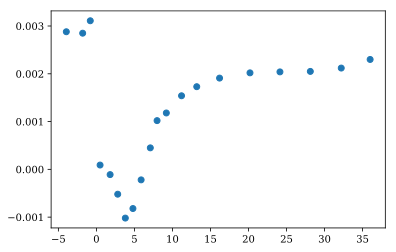

In [8]:
plt.plot(x_benchmark,Cf_benchmark,'o')

In [9]:
filename = 'Data/cp.expnew.bottomwall.dat'
data = np.genfromtxt(filename,delimiter='',skip_header=6)
x_benchmark = data[:,0]
Cp_benchmark = data[:,1]


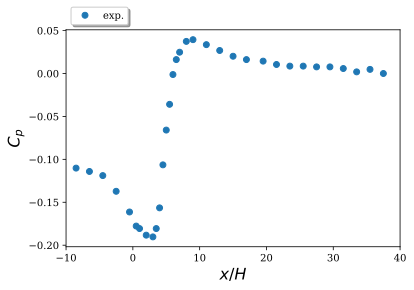

In [10]:
plt.plot(x_benchmark,Cp_benchmark,'o',label = r"exp.")
plt.xlim(-10,40)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=4, shadow=True, fancybox=True)
plt.xlabel("$x/H$", fontdict = fontlabel)
plt.ylabel("$C_p$", fontdict = fontlabel)
plt.show()